# Data Science Capstone Project

## Exploring for potential new italian restaurant in Bilbao


**Table of Contents**

1. [Introducción](#id1)

   a) [Background](#id2)
   
   b) [Business problem](#id3)
   
   c) [Interest](#id4)
   
   
2. [Data](#id5)

3. [Methodology](#id6)

4. [Data Preparation](#id7)

   a.[Scrapping Bilbao Districts Table from Wikipedia](#id8)
   
   b.[Bilbao District Map](#id9)

5. [Data Analysis](#id10)
 
6. [Results and Discussion](#id11)


## 1. Introduction <a name="id1"></a>

### a. Background <a name="id2"></a>

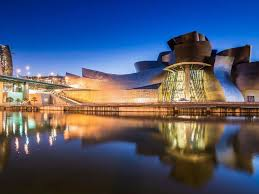

This report is for those who are planning to start a new italian restaurant in the city of Bilbao. 
is a city in northern Spain, the largest city in the province of Biscay and in the Basque Country as a whole. It is also the largest city proper in northern Spain. Bilbao is the tenth largest city in Spain, with a population of 345,141 as of 2015. The Bilbao metropolitan area has 1,037,847 inhabitants, making it one of the most populous metropolitan areas in northern Spain; with a population of 875,552 the comarca of Greater Bilbao is the fifth-largest urban area in Spain. Bilbao is also the main urban area in what is defined as the Greater Basque region.
Nowadays, Bilbao is a vigorous service city that is experiencing an ongoing social, economic, and aesthetic revitalisation process, started by the iconic Bilbao Guggenheim Museum, and continued by infrastructure investments, such as the airport terminal, the rapid transit system, the tram line, the Azkuna Zentroa, and the currently under development Abandoibarra and Zorrozaurre renewal projects.

The real tourist surge though would come much later with the inauguration of the Guggenheim Museum Bilbao in 1997. Thereafter tourist arrivals registered a continued upward trend, reaching over 932,000 visitors in 2018. The trend was exponential considering that in 1995, Bilbao only counted 25,000 tourists. 

It provides a suggestion on what would be the best venue to start a new italian restaurant in a highly visited city with already many good restaurants. 

We will go through the benefits and pitfalls of opening a new italian restaurant in a highly visited city with already many restaurants offering their services. The core of Bilbao is made of eight districts.


### b. Business Problem <a name="id3"></a>
This report focusses on the issue of where to open a new italian restaurant in a city like Bilbao, once one has decided to go ahead. Let’s imagine an investment company wants to open a new luxury hotel, a first and foremost important decision will be the location for its new italian restaurant.

### c. Interest<a name="id4"></a>
On what basis can the company decide its new italian restaurant location?

While selecting the place there are key points to consider like they need to check out like where the most well-visited venues of the city are?

If incase there are already other italian restaurant which have good ratings, will it be risky to open new one near these italian restaurants?¶

## 2. Data<a name="id5"></a>

Based on the criteria specified above, the factors that will influence the final decision are: -

+ Number of existing restaurants an coffees in the neighbourhood (any type of restaurant)

+ Number of and distance to Italian restaurants in the neighbourhood

+ The tourist places

The following data sources will be needed to extract/generate the required information: -

+ List of all districts in Bilbao - https://en.wikipedia.org/wiki/Bilbao#Tourism

+ Coordinates of all districts and venues - GeoPy Nominatim geocoding

+ Number of restaurants and their type and location in every neighbourhood - Foursquare API - https://developer.foursquare.com


## 3. Methodology<a name="id6"></a>

In this project the first step will be to collect data on the districts of Bilbao from the internet. There are no relevant datasets available for this and therefore, data will need to be scraped from a webpage. The location coordinates of each district will then be obtained with the help of GeoPy Nominatim geolocator and appended to the neighbourhood data. Using this data, a folium map of the Bilbao districts will be created.

The second step will be to explore each of district and their venues using Foursquare location data. The venues of the districts will be analyzed in detail and patterns will be discovered. This discovery of patterns will be carried out by grouping the districts using k-means clustering. Following this, each cluster will be examined and a decision will be made regarding which cluster fits the shareholder's requirements. The factor that will determine this is the frequency of occurrence of restaurants and other food venues within the cluster.

Once a cluster is picked, the districts in that cluster will be investigated with regards to the number of Italian restaurants in its vicinity. The ones that fit the requirements will be further explored and shortlisted based on how small their respective distances to the center of Bilbao are. 

The results of the analysis will highlight potential districts where an Italian restaurant may be opened based on geographical location and proximity to competitors. This will only serve as a starting point since there are a lot of other factors that influence such a decision.


## 4. Data Preparation <a name="id7"></a>

### a. Scrapping Bilbao Districts Table from Wikipedia<a name="id8"></a>

#### Importing Libraries
The first step in the analysis is importing the required libraries.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
url = "https://en.wikipedia.org/wiki/Bilbao#Tourism"
website_url = requests.get(url).text
soup = BeautifulSoup(website_url,'lxml')
#table=soup.find('table', attrs={'class':'wikitable'})
table=soup.find('table')
table2=table.find_next_sibling('table')
table3=table2.find_next_sibling('table')
table3

<table class="wikitable">
<tbody><tr style="background:#efefef;">
<th style="width:40px; text-align:center;"><small>Number</small>
</th>
<th style="width:100px; text-align:center;"><small>District</small>
</th>
<th style="width:400px; text-align:center;"><small>Neighbourhoods</small>
</th>
<th style="width:50px; text-align:center;"><small>Area<br/>(km<sup>2</sup>)</small>
</th>
<th style="width:50px; text-align:center;"><small>Population<br/>(2009)<sup class="reference" id="cite_ref-101"><a href="#cite_note-101">[101]</a></sup></small>
</th>
<th style="width:300px; text-align:center;"><small>Location</small>
</th></tr>
<tr>
<td style="text-align:center;"><small>1</small>
</td>
<td style="text-align:center;"><small><a href="/wiki/Deusto" title="Deusto">Deusto</a></small>
</td>
<td style="text-align:left;"><small><i><a class="new" href="/w/index.php?title=Arangoiti&amp;action=edit&amp;redlink=1" title="Arangoiti (page does not exist)">Arangoiti</a>, <a class="new" href="/w/index.php?titl

In [4]:

totals=table3.find_all('tr')
nrows=len(totals)
nrows

9

In [5]:
# The header of DataFrame is the first row of data
header=totals[0].text.split()
header

['Number',
 'District',
 'Neighbourhoods',
 'Area(km2)',
 'Population(2009)[101]',
 'Location']

In [6]:
# Checking row 2 as sample
totals[4].text

'\n4\n\nBegoña\n\nBegoña, Bolueta, and Santutxu.\n\n1.77\n\n43,030\n'

In [7]:
# Extracting cells into a dataframe
rows =[]
n=1
while n < nrows :
    District=totals[n].text.split('\n')[3]
    Area=totals[n].text.split('\n')[7]
    Population=totals[n].text.split('\n')[9]
    rows.append((District,Area,Population))
    n=n+1

df=pd.DataFrame(rows, columns=['District', 'Area km²', 'Population'])
df.head(11)

,District,Area km²,Population
0,Deusto,4.95,"51,656"
1,Uribarri,4.19,"38,335"
2,Otxarkoaga-Txurdinaga,3.90,"28,518"
3,Begoña,1.77,"43,030"
4,Ibaiondo,9.65,"61,029"
5,Abando,2.14,"51,718"
6,Errekalde,6.96,"47,787"
7,Basurto-Zorroza,7.09,"33,658"


In [8]:
# define the data frame columns
column_names = ['District', 'Latitude', 'Longitude'] 

# instantiate the data frame
districts = pd.DataFrame(columns=column_names)

In [9]:
geolocator = Nominatim(user_agent="la_explorer",timeout=5)
for i in range(0,len(df)):
    
    address = df.District[i]+', Bilbao'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    districts = districts.append({'District': df.District[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

In [10]:
districts

,District,Latitude,Longitude
0,Deusto,43.271387,-2.949581
1,Uribarri,43.266839,-2.919947
2,Otxarkoaga-Txurdinaga,43.260369,-2.896813
3,Begoña,43.260246,-2.919849
4,Ibaiondo,43.239543,-2.929882
5,Abando,43.262788,-2.934947
6,Errekalde,43.238485,-2.954979
7,Basurto-Zorroza,0.000000,0.000000


In [11]:
districts.loc[7, 'Latitude']=43.2681

In [12]:
districts.loc[7, 'Longitude']=-2.9656

In [13]:
districts

,District,Latitude,Longitude
0,Deusto,43.271387,-2.949581
1,Uribarri,43.266839,-2.919947
2,Otxarkoaga-Txurdinaga,43.260369,-2.896813
3,Begoña,43.260246,-2.919849
4,Ibaiondo,43.239543,-2.929882
5,Abando,43.262788,-2.934947
6,Errekalde,43.238485,-2.954979
7,Basurto-Zorroza,43.268100,-2.965600


In [14]:
districts['Latitude']=districts['Latitude'].astype(float)
districts['Longitude']=districts['Longitude'].astype(float)
districts

,District,Latitude,Longitude
0,Deusto,43.271387,-2.949581
1,Uribarri,43.266839,-2.919947
2,Otxarkoaga-Txurdinaga,43.260369,-2.896813
3,Begoña,43.260246,-2.919849
4,Ibaiondo,43.239543,-2.929882
5,Abando,43.262788,-2.934947
6,Errekalde,43.238485,-2.954979
7,Basurto-Zorroza,43.268100,-2.965600


In [15]:
districts.loc[3, 'Latitude']=43.25889
districts.loc[3, 'Longitude']=-2.916111
districts.loc[4, 'Latitude']=43.2569
districts.loc[4, 'Longitude']=-2.923331
districts.loc[6, 'Latitude']=43.251944
districts.loc[6, 'Longitude']=-2.946111

In [16]:
districts_final=pd.merge(df,districts, how='right', on = 'District')
districts_final

,District,Area km²,Population,Latitude,Longitude
0,Deusto,4.95,"51,656",43.271387,-2.949581
1,Uribarri,4.19,"38,335",43.266839,-2.919947
2,Otxarkoaga-Txurdinaga,3.90,"28,518",43.260369,-2.896813
3,Begoña,1.77,"43,030",43.258890,-2.916111
4,Ibaiondo,9.65,"61,029",43.256900,-2.923331
5,Abando,2.14,"51,718",43.262788,-2.934947
6,Errekalde,6.96,"47,787",43.251944,-2.946111
7,Basurto-Zorroza,7.09,"33,658",43.268100,-2.965600


### b. Bilbao District Map<a name="id9"></a>

In [17]:
# Obtaining the coordinates of the center of Bilbao

address = 'Bilbao, Spain'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))


The geograpical coordinates of Bilbao, Spain are 43.2630051, -2.9349915.


In [18]:
# Creating a map of Bilbao with districts superimposed on top
map_bi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(districts_final['Latitude'], districts_final['Longitude'], districts_final['District']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_bi)  
    
map_bi

## 5. Data Analysis<a name="id10"></a>

### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'V1N5E0IK20SUEVBQC51IFICGCDE1ZOKTC4TOIQLRGAIOZXCG' # your Foursquare ID
CLIENT_SECRET = 'GTJOASFZWKE3S502LMLKTDWY14UJG3SYUHFU3TZFHMUN1I5U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [20]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

### Exploring Districts in Bilbao

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
bilbao_venues = getNearbyVenues(names=districts_final['District'],
                                   latitudes=districts_final['Latitude'],
                                   longitudes=districts_final['Longitude'])

Deusto
Uribarri
Otxarkoaga-Txurdinaga
Begoña
Ibaiondo
Abando
Errekalde
Basurto-Zorroza


In [23]:
print(bilbao_venues.shape)

(218, 7)


In [24]:
bilbao_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Deusto,43.271387,-2.949581,Munich,43.271183,-2.944475,Burger Joint
1,Deusto,43.271387,-2.949581,La Tortilla,43.269937,-2.950183,Spanish Restaurant
2,Deusto,43.271387,-2.949581,La Tapa,43.270046,-2.946396,Café
3,Deusto,43.271387,-2.949581,Restaurante Bordatxo,43.272187,-2.944992,Spanish Restaurant
4,Deusto,43.271387,-2.949581,Deustoarrak,43.271166,-2.945160,Restaurant
5,Deusto,43.271387,-2.949581,Plaza San Pedro de Deusto,43.271936,-2.945661,Plaza
6,Deusto,43.271387,-2.949581,Pulperia Naroa,43.270235,-2.953144,Restaurant
7,Deusto,43.271387,-2.949581,Bertiz,43.271205,-2.946872,Bakery
8,Deusto,43.271387,-2.949581,Telepizza,43.271436,-2.949716,Pizza Place
9,Deusto,43.271387,-2.949581,Moon Hostel Bio,43.272387,-2.946787,Boarding House


In [25]:
# Number of venues per District
bilbao_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Abando,100,100,100,100,100,100
Basurto-Zorroza,5,5,5,5,5,5
Begoña,25,25,25,25,25,25
Deusto,19,19,19,19,19,19
Errekalde,4,4,4,4,4,4
Ibaiondo,56,56,56,56,56,56
Otxarkoaga-Txurdinaga,2,2,2,2,2,2
Uribarri,7,7,7,7,7,7


In [26]:

print('There are {} uniques categories.'.format(len(bilbao_venues['Venue Category'].unique())))

There are 74 uniques categories.


In [27]:
# one hot encoding
bilbao_onehot = pd.get_dummies(bilbao_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bilbao_onehot['District'] = bilbao_venues['District'] 

# move district column to the first column
cols=list(bilbao_onehot.columns.values)
cols.pop(cols.index('District'))
bilbao_onehot=bilbao_onehot[['District']+cols]

# rename Neighborhood for Districts so that future merge works
bilbao_onehot.rename(columns = {'District': 'District'}, inplace = True)
bilbao_onehot.head(15)

,District,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Farmers Market,Flea Market,Food & Drink Shop,Food Truck,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,German Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Hobby Shop,Hostel,Hotel,Irish Pub,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Metro Station,Modern European Restaurant,Mountain,Museum,Music Venue,Paella Restaurant,Park,Performing Arts Venue,Pie Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Wine Bar
0,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Deusto,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Deusto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Deusto,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Grouping rows by district and by the mean of the frequency of occurrence of each category

In [28]:
bilbao_grouped = bilbao_onehot.groupby('District').mean().reset_index()
bilbao_grouped

,District,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Farmers Market,Flea Market,Food & Drink Shop,Food Truck,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,German Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Hobby Shop,Hostel,Hotel,Irish Pub,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Metro Station,Modern European Restaurant,Mountain,Museum,Music Venue,Paella Restaurant,Park,Performing Arts Venue,Pie Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Wine Bar
0,Abando,0.01,0.000000,0.0,0.010000,0.040000,0.040,0.010000,0.000000,0.010000,0.000000,0.030000,0.01,0.000000,0.00,0.020000,0.000000,0.040000,0.00,0.02,0.04,0.020000,0.01,0.01,0.02,0.000000,0.01,0.01,0.000000,0.000000,0.01,0.000000,0.000000,0.020000,0.000000,0.01,0.01,0.01,0.010000,0.00,0.00,0.000000,0.00,0.01,0.000000,0.020000,0.01,0.02,0.030000,0.01,0.01,0.000000,0.01,0.00,0.01,0.000000,0.01,0.000000,0.000000,0.000000,0.010000,0.0,0.040000,0.010000,0.080000,0.010000,0.02,0.05,0.070000,0.01,0.01,0.060000,0.01,0.010000,0.040000
1,Basurto-Zorroza,0.00,0.000000,0.2,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.20,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
2,Begoña,0.00,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.000000,0.04,0.000000,0.000000,0.080000,0.04,0.00,0.00,0.080000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.04,0.000000,0.04,0.00,0.040000,0.080000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.040000,0.000000,0.000000,0.000000,0.0,0.040000,0.000000,0.040000,0.000000,0.04,0.00,0.040000,0.00,0.04,0.000000,0.00,0.000000,0.040000
3,Deusto,0.00,0.000000,0.0,0.052632,0.052632,0.000,0.000000,0.000000,0.000000,0.052632,0.000000,0.00,0.000000,0.00,0.052632,0.000000,0.052632,0.00,0.00,0.00,0.052632,0.00,0.00,0.00,0.052632,0.00,0.00,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.052632,0.00,0.00,0.000000,0.00,0.00,0.052632,0.000000,0.00,0.00,0.000000,0.00,0.00,0.052632,0.00,0.00,0.00,0.052632,0.00,0.000000,0.000000,0.000000,0.052632,0.0,0.052632,0.052632,0.105263,0.000000,0.00,0.00,0.105263,0.00,0.00,0.000000,0.00,0.000000,0.000000
4,Errekalde,0.00,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.250000,0.25,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.25,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
5,Ibaiondo,0.00,0.017857,0.0,0.000000,0.017857,0.125,0.017857,0.017857,0.017857,0.000000,0.017857,0.00,0.017857,0.00,0.000000,0.017857,0.035714,0.00,0.00,0.00,0.017857,0.00,0.00,0.00,0.000000,0.00,0.00,0.017857,0.017857,0.00,0.000000,0.017857,0.035714,0.053571,0.00,0.00,0.00,0.000000,0.00,0.00,0.017857,0.00,0.00,0.035714,0.017857,0.00,0.00,0.0

### Printing districts along with the top 12 most common venues

In [29]:
num_top_venues = 12

for hood in bilbao_grouped['District']:
    print("----"+hood+"----")
    temp = bilbao_grouped[bilbao_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abando----
                  venue  freq
0            Restaurant  0.08
1    Spanish Restaurant  0.07
2      Tapas Restaurant  0.06
3    Seafood Restaurant  0.05
4              Wine Bar  0.04
5                 Plaza  0.04
6                Bakery  0.04
7                   Bar  0.04
8          Cocktail Bar  0.04
9                  Café  0.04
10            Bookstore  0.03
11  Japanese Restaurant  0.03


----Basurto-Zorroza----
                         venue  freq
0                  Flea Market   0.2
1         Arts & Entertainment   0.2
2        Performing Arts Venue   0.2
3        General Entertainment   0.2
4                   Playground   0.2
5                  Art Gallery   0.0
6                     Mountain   0.0
7   Modern European Restaurant   0.0
8                Metro Station   0.0
9     Mediterranean Restaurant   0.0
10                      Lounge   0.0
11         Japanese Restaurant   0.0


----Begoña----
                   venue  freq
0                    Bar  0.20
1        

In [30]:
#Creating a new data frame and displaying the top 13 venues for each district
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:

num_top_venues = 13

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = bilbao_grouped['District']

for ind in np.arange(bilbao_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bilbao_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,Abando,Restaurant,Spanish Restaurant,Tapas Restaurant,Seafood Restaurant,Wine Bar,Cocktail Bar,Plaza,Café,Bar,Bakery,Bookstore,Japanese Restaurant,Sandwich Place
1,Basurto-Zorroza,General Entertainment,Arts & Entertainment,Performing Arts Venue,Flea Market,Playground,Electronics Store,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Falafel Restaurant,Clothing Store
2,Begoña,Bar,Hotel,Coffee Shop,Café,Wine Bar,Boarding House,Gym / Fitness Center,History Museum,Hostel,Chinese Restaurant,Brewery,Park,Gastropub
3,Deusto,Spanish Restaurant,Restaurant,Food Truck,Plaza,Café,Metro Station,Burger Joint,Hostel,Music Venue,Diner,Boarding House,Pizza Place,Coffee Shop
4,Errekalde,Mountain,Grocery Store,Gym,Plaza,Electronics Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Wine Bar,Clothing Store
5,Ibaiondo,Tapas Restaurant,Bar,Restaurant,Plaza,Gay Bar,Hostel,Gastropub,Spanish Restaurant,Café,Farmers Market,Burrito Place,Japanese Restaurant,Hotel
6,Otxarkoaga-Txurdinaga,Bar,Wine Bar,Farmers Market,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Flea Market,Clothing Store,Food & Drink Shop
7,Uribarri,Hotel,Gastropub,Metro Station,Tapas Restaurant,Grocery Store,Park,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Clothing Store


## Clustering Districts


In [32]:
# set number of clusters
kclusters = 5

bilbao_grouped_clustering = bilbao_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bilbao_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 2, 2, 0, 2, 1, 4], dtype=int32)

In [33]:
bilbao_merged = districts

# add clustering labels
bilbao_merged['Cluster Labels'] = kmeans.labels_

# merge Bilbao_grouped with bilbao_data to add latitude/longitude for each neighborhood
bilbao_merged = bilbao_merged.join(districts_venues_sorted.set_index('District'), on='District')

bilbao_merged.head(15) # check the last columns!


,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,Deusto,43.271387,-2.949581,2,Spanish Restaurant,Restaurant,Food Truck,Plaza,Café,Metro Station,Burger Joint,Hostel,Music Venue,Diner,Boarding House,Pizza Place,Coffee Shop
1,Uribarri,43.266839,-2.919947,3,Hotel,Gastropub,Metro Station,Tapas Restaurant,Grocery Store,Park,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Clothing Store
2,Otxarkoaga-Txurdinaga,43.260369,-2.896813,2,Bar,Wine Bar,Farmers Market,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Flea Market,Clothing Store,Food & Drink Shop
3,Begoña,43.258890,-2.916111,2,Bar,Hotel,Coffee Shop,Café,Wine Bar,Boarding House,Gym / Fitness Center,History Museum,Hostel,Chinese Restaurant,Brewery,Park,Gastropub
4,Ibaiondo,43.256900,-2.923331,0,Tapas Restaurant,Bar,Restaurant,Plaza,Gay Bar,Hostel,Gastropub,Spanish Restaurant,Café,Farmers Market,Burrito Place,Japanese Restaurant,Hotel
5,Abando,43.262788,-2.934947,2,Restaurant,Spanish Restaurant,Tapas Restaurant,Seafood Restaurant,Wine Bar,Cocktail Bar,Plaza,Café,Bar,Bakery,Bookstore,Japanese Restaurant,Sandwich Place
6,Errekalde,43.251944,-2.946111,1,Mountain,Grocery Store,Gym,Plaza,Electronics Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Wine Bar,Clothing Store
7,Basurto-Zorroza,43.268100,-2.965600,4,General Entertainment,Arts & Entertainment,Performing Arts Venue,Flea Market,Playground,Electronics Store,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Falafel Restaurant,Clothing Store


In [34]:
bilbao_merged=bilbao_merged.dropna()
bilbao_merged['Cluster Labels'] = bilbao_merged['Cluster Labels'].astype(int)


### Clusters visualization of Bilbao Districts

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bilbao_merged['Latitude'], bilbao_merged['Longitude'], bilbao_merged['District'], bilbao_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examing the CLusters

### Cluster 0 

In [36]:

bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 0, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
4,Ibaiondo,Tapas Restaurant,Bar,Restaurant,Plaza,Gay Bar,Hostel,Gastropub,Spanish Restaurant,Café,Farmers Market,Burrito Place,Japanese Restaurant,Hotel



### Cluster 1

In [37]:
bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 1, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
6,Errekalde,Mountain,Grocery Store,Gym,Plaza,Electronics Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Wine Bar,Clothing Store


### Cluster 2

In [38]:
bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 2, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,Deusto,Spanish Restaurant,Restaurant,Food Truck,Plaza,Café,Metro Station,Burger Joint,Hostel,Music Venue,Diner,Boarding House,Pizza Place,Coffee Shop
2,Otxarkoaga-Txurdinaga,Bar,Wine Bar,Farmers Market,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Flea Market,Clothing Store,Food & Drink Shop
3,Begoña,Bar,Hotel,Coffee Shop,Café,Wine Bar,Boarding House,Gym / Fitness Center,History Museum,Hostel,Chinese Restaurant,Brewery,Park,Gastropub
5,Abando,Restaurant,Spanish Restaurant,Tapas Restaurant,Seafood Restaurant,Wine Bar,Cocktail Bar,Plaza,Café,Bar,Bakery,Bookstore,Japanese Restaurant,Sandwich Place


### Cluster 3

In [39]:
bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 3, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
1,Uribarri,Hotel,Gastropub,Metro Station,Tapas Restaurant,Grocery Store,Park,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Clothing Store


### Cluster 4

In [40]:
bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 4, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
7,Basurto-Zorroza,General Entertainment,Arts & Entertainment,Performing Arts Venue,Flea Market,Playground,Electronics Store,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Falafel Restaurant,Clothing Store


In [41]:
#Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category
bi_results = pd.DataFrame(kmeans.cluster_centers_)
bi_results.columns = bilbao_grouped_clustering.columns
bi_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3', 'Cluster 4']
bi_results['Total Sum'] = bi_results.sum(axis = 1)
bi_results

,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Farmers Market,Flea Market,Food & Drink Shop,Food Truck,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,German Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Hobby Shop,Hostel,Hotel,Irish Pub,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Metro Station,Modern European Restaurant,Mountain,Museum,Music Venue,Paella Restaurant,Park,Performing Arts Venue,Pie Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Wine Bar,Total Sum
Cluster 0,0.0000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.0000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.250000,0.25,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.0000,0.25,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,1.0
Cluster 1,0.0000,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.0000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,1.0
Cluster 2,0.0025,0.004464,0.0,0.015658,0.027622,0.09125,0.006964,0.004464,0.006964,0.023158,0.011964,0.0025,0.004464,0.01,0.018158,0.004464,0.052086,0.01,0.005,0.01,0.042622,0.0025,0.0025,0.005,0.013158,0.0025,0.0025,0.004464,0.004464,0.0025,0.013158,0.004464,0.023929,0.013393,0.0025,0.0025,0.0025,0.015658,0.00,0.01,0.004464,0.01,0.0025,0.032086,0.029464,0.0025,0.005,0.011964,0.0025,0.0025,0.013158,0.0025,0.00,0.0025,0.013158,0.0025,0.014464,0.004464,0.004464,0.015658,0.0,0.051015,0.020122,0.078637,0.006964,0.015,0.0125,0.062744,0.0025,0.0125,0.046250,0.0025,0.006964,0.024464,1.0
Cluster 3,0.0000,0.000000,0.2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.0000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.200000,0.0000,0.000000,0.000000,0.000000,0.000000,0.2000,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.0000,0.000000,0.0000,0.000000,0.200000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,1.0
Cluster 4,0.0000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.0000,0.0000,0.000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.142857,0.000000,0.0000,0.0000,0.0000,0.142857,0.00,0.00,0.000000,0.00,0.0000,0.000000,0.285714,0.0000,0.000,0.000000,0.0000,0.0000,0.142857,0.0000,0.00,0.0000,0.000000,0.0000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,0.142857,0.0000,0.000000,0.000000,1.0


### Chosing a cluster

#### Visualizing Top 12 venues for each cluster

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('12 Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

### Cluster 0

,Grocery Store,Plaza,Mountain,Gym,Tapas Restaurant,Museum,Gym / Fitness Center,Gym Pool,History Museum,Hobby Shop,Hostel,Hotel,Irish Pub,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Metro Station,Modern European Restaurant,Theater,Music Venue,Supermarket,Paella Restaurant,Art Museum,Performing Arts Venue,Pie Shop,Pizza Place,Playground,Thai Restaurant,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Park,Art Gallery,Grilled Meat Restaurant,German Restaurant,Café,Burrito Place,Burger Joint,Brewery,Breakfast Spot,Boutique,Bookstore,Boarding House,Bistro,Beer Store,Beer Bar,Bar,Bakery,Asian Restaurant,Arts & Entertainment,Chinese Restaurant,Clothing Store,Cocktail Bar,Flea Market,General Entertainment,Gay Bar,Gastropub,Fried Chicken Joint,Food Truck,Food & Drink Shop,Farmers Market,Coffee Shop,Falafel Restaurant,Electronics Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Wine Bar
Cluster 0,0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


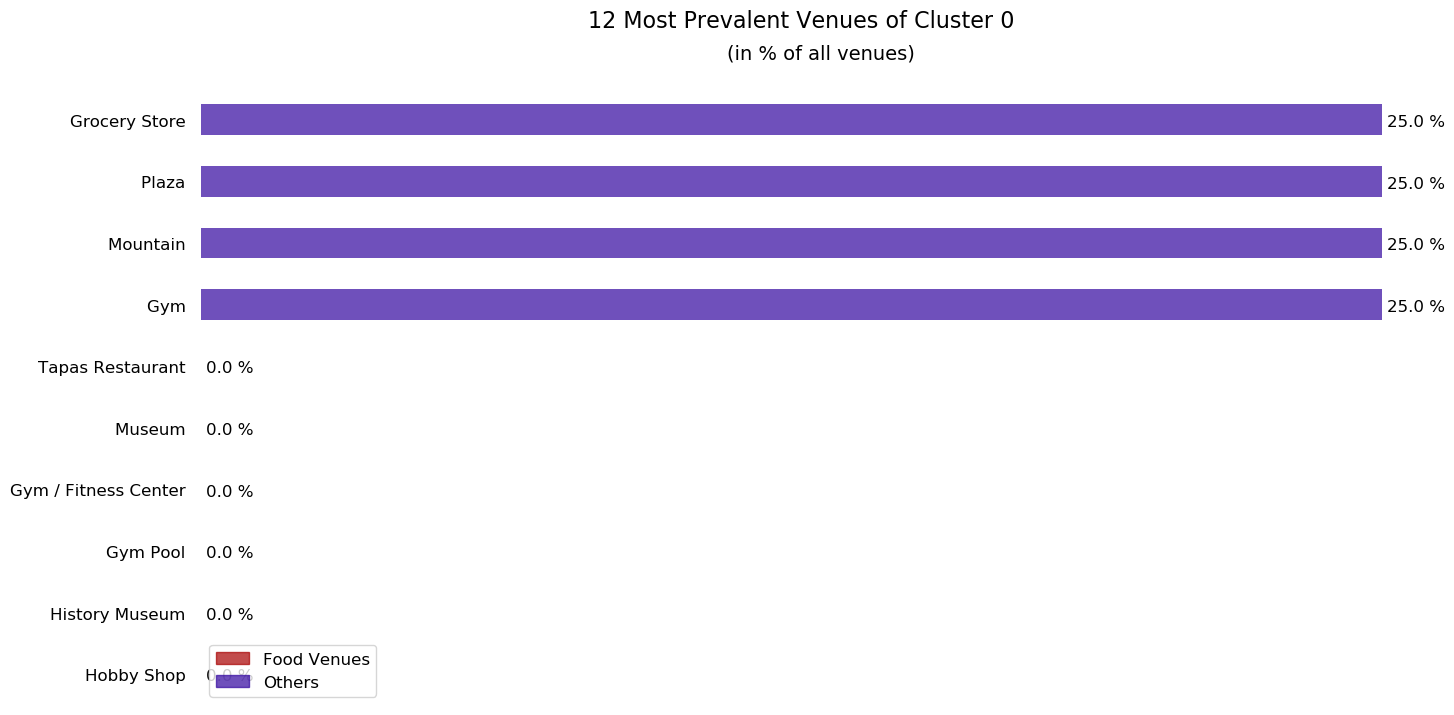

In [43]:
cluster0=pd.DataFrame(bi_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)


In this cluster there are no restaurants, coffee shops or bars. These facts indicate that it is not an entertainment area with what would not be the best area to set up a new restaurant.

### Cluster 1

,Bar,Art Gallery,Japanese Restaurant,Music Venue,Museum,Mountain,Modern European Restaurant,Metro Station,Mediterranean Restaurant,Lounge,Italian Restaurant,Park,Irish Pub,Hotel,Hostel,Hobby Shop,History Museum,Gym Pool,Paella Restaurant,Performing Arts Venue,Gym,Seafood Restaurant,Theater,Thai Restaurant,Tapas Restaurant,Supermarket,Steakhouse,Spanish Restaurant,Sandwich Place,Pie Shop,Rock Club,Restaurant,Pub,Plaza,Playground,Pizza Place,Gym / Fitness Center,Grocery Store,Art Museum,Grilled Meat Restaurant,Chinese Restaurant,Café,Burrito Place,Burger Joint,Brewery,Breakfast Spot,Boutique,Bookstore,Boarding House,Bistro,Beer Store,Beer Bar,Bakery,Asian Restaurant,Arts & Entertainment,Clothing Store,Cocktail Bar,Coffee Shop,Food & Drink Shop,German Restaurant,General Entertainment,Gay Bar,Gastropub,Fried Chicken Joint,Food Truck,Flea Market,Deli / Bodega,Farmers Market,Falafel Restaurant,Electronics Store,Diner,Dessert Shop,Department Store,Wine Bar
Cluster 1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


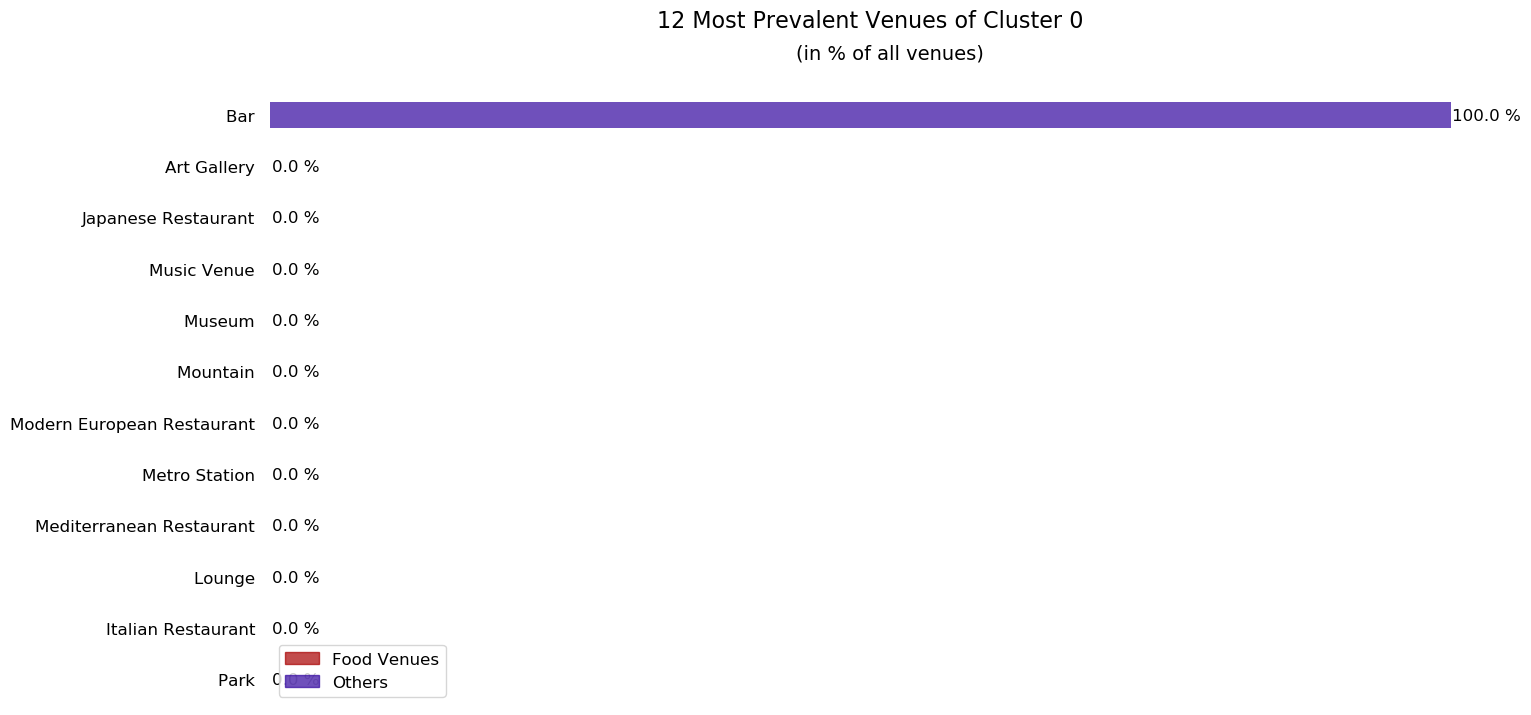

In [44]:
cluster1=pd.DataFrame(bi_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,11::-1]
generate_plot(clus1,0)


In this cluster there are no restaurants or coffee shops. These facts indicate that it is not an entertainment area with what would not be the best area to set up a new restaurant. Moreover, it is a mountain area.

### Cluster 2

,Bar,Restaurant,Spanish Restaurant,Café,Plaza,Tapas Restaurant,Coffee Shop,Hostel,Hotel,Bakery,Wine Bar,Gastropub,Boarding House,Pub,Burger Joint,Grocery Store,Asian Restaurant,Pizza Place,Sandwich Place,Park,Gay Bar,Music Venue,Metro Station,Food Truck,Diner,Seafood Restaurant,Supermarket,Bookstore,Japanese Restaurant,History Museum,Chinese Restaurant,Gym / Fitness Center,Cocktail Bar,Brewery,Bistro,Rock Club,Beer Bar,Theater,Italian Restaurant,Dessert Shop,Clothing Store,Pie Shop,Gym Pool,Burrito Place,Beer Store,Farmers Market,Art Museum,Breakfast Spot,Fried Chicken Joint,Performing Arts Venue,Flea Market,General Entertainment,Paella Restaurant,Thai Restaurant,Steakhouse,Irish Pub,Museum,German Restaurant,Deli / Bodega,Department Store,Electronics Store,Falafel Restaurant,Food & Drink Shop,Grilled Meat Restaurant,Hobby Shop,Boutique,Lounge,Mediterranean Restaurant,Modern European Restaurant,Art Gallery,Gym,Mountain,Playground,Arts & Entertainment
Cluster 2,0.09125,0.078637,0.062744,0.052086,0.051015,0.04625,0.042622,0.032086,0.029464,0.027622,0.024464,0.023929,0.023158,0.020122,0.018158,0.015658,0.015658,0.015658,0.015,0.014464,0.013393,0.013158,0.013158,0.013158,0.013158,0.0125,0.0125,0.011964,0.011964,0.01,0.01,0.01,0.01,0.01,0.006964,0.006964,0.006964,0.006964,0.005,0.005,0.005,0.004464,0.004464,0.004464,0.004464,0.004464,0.004464,0.004464,0.004464,0.004464,0.004464,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0,0.0,0.0,0.0


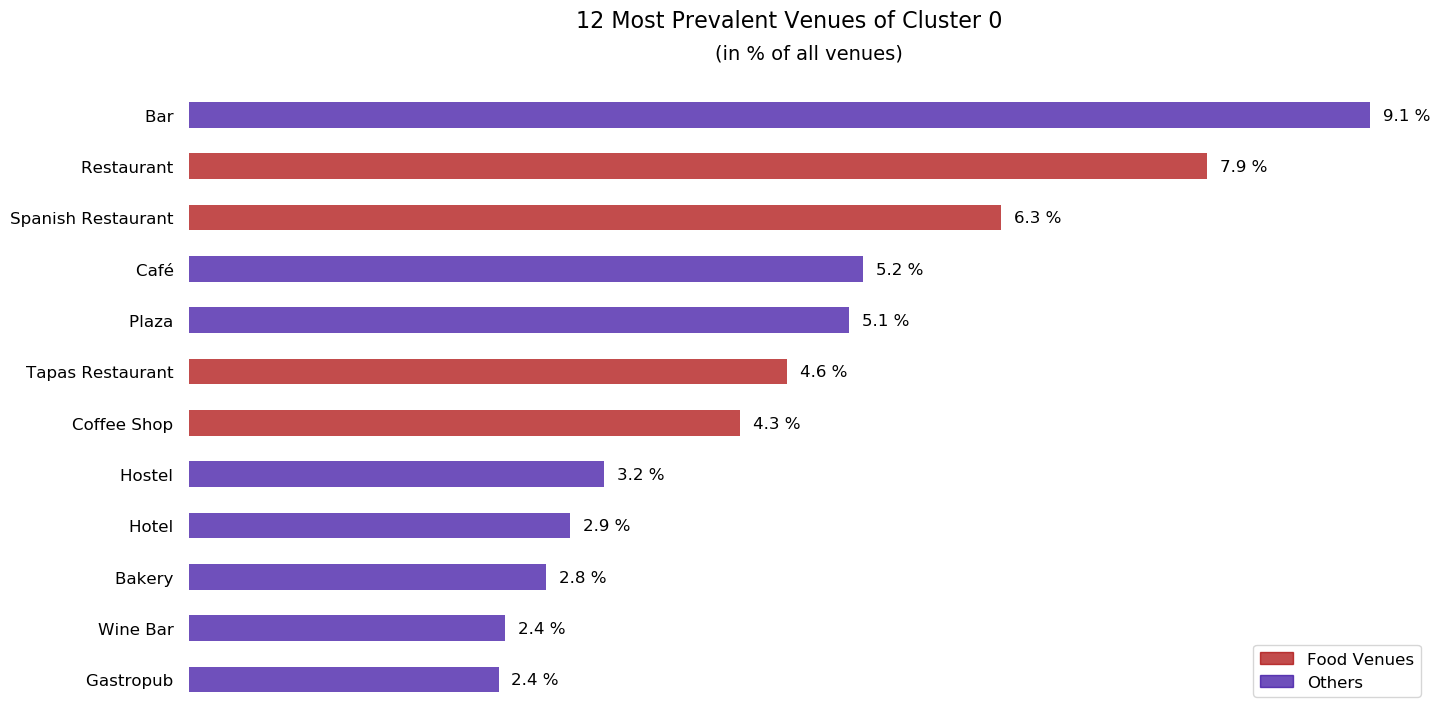

In [45]:
cluster2=pd.DataFrame(bi_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,11::-1]
generate_plot(clus2,0)


This cluster is characterized by mostly bars, restaurants and coffee shops. In fact, Deusto, Begoña and Abando are tourist districts of Bilbao. Therefore, any of these three districts could be candidates to set up a new restaurant.


### Cluster 3

,Flea Market,Arts & Entertainment,Performing Arts Venue,General Entertainment,Playground,Art Gallery,Mountain,Modern European Restaurant,Metro Station,Mediterranean Restaurant,Lounge,Japanese Restaurant,Music Venue,Italian Restaurant,Irish Pub,Hotel,Hostel,Hobby Shop,History Museum,Museum,Park,Paella Restaurant,Seafood Restaurant,Theater,Thai Restaurant,Tapas Restaurant,Supermarket,Steakhouse,Spanish Restaurant,Sandwich Place,Gym / Fitness Center,Rock Club,Restaurant,Pub,Plaza,Pizza Place,Pie Shop,Gym Pool,Grocery Store,Gym,Bookstore,Café,Burrito Place,Burger Joint,Brewery,Breakfast Spot,Boutique,Boarding House,Clothing Store,Bistro,Beer Store,Beer Bar,Bar,Bakery,Asian Restaurant,Chinese Restaurant,Cocktail Bar,Art Museum,Food & Drink Shop,Grilled Meat Restaurant,German Restaurant,Gay Bar,Gastropub,Fried Chicken Joint,Food Truck,Farmers Market,Coffee Shop,Falafel Restaurant,Electronics Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Wine Bar
Cluster 3,0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


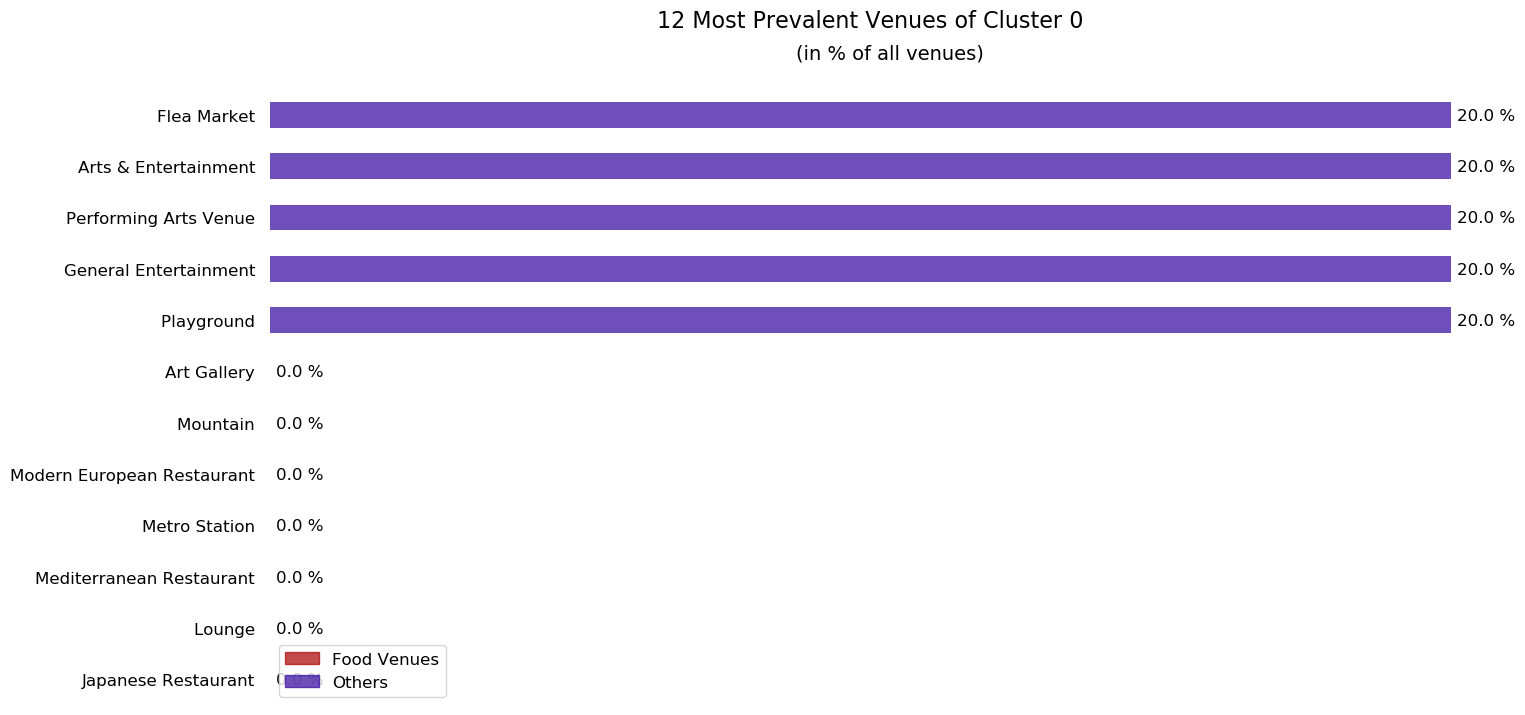

In [46]:

cluster3=pd.DataFrame(bi_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,11::-1]
generate_plot(clus3,0)

In this cluster there are no restaurants or coffee shops. These facts indicate that it is not an entertainment area with what would not be the best area to set up a new restaurant.


### Cluster 4

,Hotel,Grocery Store,Metro Station,Gastropub,Park,Tapas Restaurant,Supermarket,Steakhouse,Gym Pool,History Museum,Hobby Shop,Theater,Hostel,Thai Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Lounge,Mediterranean Restaurant,Modern European Restaurant,Mountain,Museum,Music Venue,Paella Restaurant,Gym,Performing Arts Venue,Pie Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Gym / Fitness Center,Art Gallery,Art Museum,Grilled Meat Restaurant,Café,Burrito Place,Burger Joint,Brewery,Breakfast Spot,Boutique,Bookstore,Boarding House,Bistro,Beer Store,Beer Bar,Bar,Bakery,Asian Restaurant,Arts & Entertainment,Chinese Restaurant,Clothing Store,Cocktail Bar,Flea Market,German Restaurant,General Entertainment,Gay Bar,Fried Chicken Joint,Food Truck,Food & Drink Shop,Farmers Market,Coffee Shop,Falafel Restaurant,Electronics Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Wine Bar
Cluster 4,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


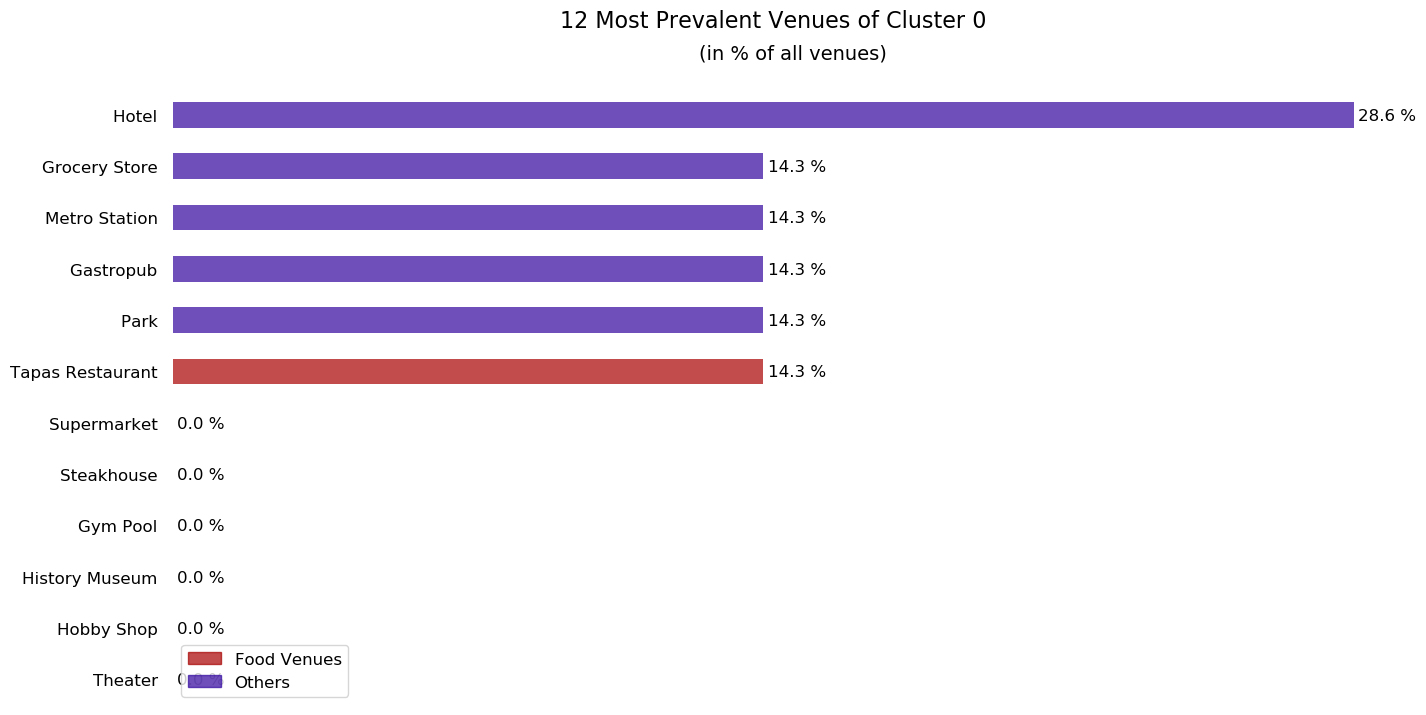

In [47]:
cluster4=pd.DataFrame(bi_results.iloc[4,0:-1]).transpose()
cluster4.sort_values(by='Cluster 4',axis=1,ascending=False,inplace=True)
display(cluster4)

clus4=cluster4.iloc[0,11::-1]
generate_plot(clus4,0)

Despite having a hotel, this district has no restaurants, bars or coffees shops that tell us that a new restaurant can succeed.

### The chosen cluster is Cluster 2.

## Investigating the chosen cluster

In [60]:
bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 2, bilbao_merged.columns[[0] + list(range(4, bilbao_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,Deusto,Spanish Restaurant,Restaurant,Food Truck,Plaza,Café,Metro Station,Burger Joint,Hostel,Music Venue,Diner,Boarding House,Pizza Place,Coffee Shop
2,Otxarkoaga-Txurdinaga,Bar,Wine Bar,Farmers Market,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Falafel Restaurant,Flea Market,Clothing Store,Food & Drink Shop
3,Begoña,Bar,Hotel,Coffee Shop,Café,Wine Bar,Boarding House,Gym / Fitness Center,History Museum,Hostel,Chinese Restaurant,Brewery,Park,Gastropub
5,Abando,Restaurant,Spanish Restaurant,Tapas Restaurant,Seafood Restaurant,Wine Bar,Cocktail Bar,Plaza,Café,Bar,Bakery,Bookstore,Japanese Restaurant,Sandwich Place


In [65]:
clus1=bilbao_merged.loc[bilbao_merged['Cluster Labels'] == 2, bilbao_merged.columns[0]].values.tolist()
clus1

['Deusto', 'Otxarkoaga-Txurdinaga', 'Begoña', 'Abando']

In [66]:
filtered_district=districts.copy()

for i in range(0,len(filtered_district)):

    if filtered_district.iloc[i,0] not in clus1:
        filtered_district.iloc[i,0]='TO DROP'

In [67]:
filtered_district=filtered_district[filtered_district.District!='TO DROP']
filtered_district.reset_index(drop=True,inplace=True)

In [68]:
filtered_district

,District,Latitude,Longitude,Cluster Labels
0,Deusto,43.271387,-2.949581,2
1,Otxarkoaga-Txurdinaga,43.260369,-2.896813,2
2,Begoña,43.258890,-2.916111,2
3,Abando,43.262788,-2.934947,2


Function to obtain and display the closest Italian restaurants from each neighbourhood in Cluster 2 and the corresponding distances

In [69]:
def get_neigh_italian(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [79]:
category='4bf58dd8d48988d110941735'#The category for Italian restaurants obtained from https://developer.foursquare.com/docs/resources/categories
radius = 650
LIMIT=30

In [80]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [83]:
for n in range(0,len(filtered_district)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_district.iloc[n,1], 
    filtered_district.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_district.iloc[n,0] + ' -------------------------------------------------')
    if n!=1: 
        get_neigh_italian(url)
        print('\n\n')

------------------------------------------------- Deusto -------------------------------------------------


,name,categories,distance,lat,lng
0,La Mafia se sienta a la mesa Bilbao - Zubiarte,Italian Restaurant,854,43.267932,-2.940171





------------------------------------------------- Otxarkoaga-Txurdinaga -------------------------------------------------
------------------------------------------------- Begoña -------------------------------------------------


,name,categories,distance,lat,lng
0,trozo,Italian Restaurant,724,43.263914,-2.921797
1,Bar Italiano,Café,435,43.255003,-2.916710





------------------------------------------------- Abando -------------------------------------------------


,name,categories,distance,lat,lng
0,La Piemontesa,Italian Restaurant,118,43.263440,-2.933784
1,Don Angelo,Italian Restaurant,96,43.262199,-2.935825
2,La Tagliatella,Italian Restaurant,343,43.263901,-2.938897
3,Ginos Bilbao,Italian Restaurant,190,43.261205,-2.934049
4,La Sauseria,Italian Restaurant,313,43.259990,-2.935410
5,La Foca Nicanora,Italian Restaurant,451,43.266843,-2.934852
6,La Tagliatella,Italian Restaurant,395,43.260861,-2.930843
7,il giardona della nonna,Italian Restaurant,622,43.267341,-2.930494
8,La Fontana trattoria,Italian Restaurant,279,43.264570,-2.937381
9,La Tagliatella,Italian Restaurant,636,43.261886,-2.927196


From the data frames above, it can be observed that Abando has 16 Italian Restaurants within 650 meters from its center, so this district is not a good candidate. Begoña has fewer (2) and Deusto only one. 
It should be noted that Deusto is a tourist area where University of Deusto and Bilbao Guggenheim Museum are located, while Begoña is not a tourist area. In addition, Deusto has an Italian restaurant at a long distance. For all these reasons, **I consider that the best district would be Deusto.**

## 6. Results and Discussion<a name="id11"></a>

In the beginning of the analysis the data frame of Bilbao Districts was trimmed to include only the ones that had 12 or more venues. This decision was taken as it made sense to set up a restaurant in one of the more popular districts, thereby attracting the attention of a lot more people.

When clustering the districts, the optimal value of k (k=5) for the dataset was arrived. As a consequence, all districts were grouped into 4 clusters using k-means clustering. In order to examine the deterministic characteristics of each cluster, a data frame for each cluster was created that included their most frequently occurring venues in descending order. A horizontal bar plot was generated showing the top 12 venues for each cluster, highlighting the food venues. This helped in determining the optimal cluster for further analysis. All of the observations pointed in the direction of Cluster 1 being that cluster. 

The following step was to obtain and display the closest Italian restaurants from each neighbourhood in Cluster 1 and their corresponding distances. It was observed that Abando has 16 Italian Restaurants within 700 meters from its center, so this district is not a good candidate. Begoña has fewer (2) and Deusto only one.
It should be noted that Deusto is a tourist area where University of Deusto and Bilbao Guggenheim Museum are located, while Begoña is not a tourist area. In addition, Deusto has an Italian restaurant at a long distance. 

For all these reasons, I consider that the best district would be Deusto.

In conclusion, this project would have had better results if there were more available data in terms of actual land pricing data within the area, public transportantion access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

However, based on the available data, my advice to the investment company would be to focus on only Deusto district when investing on a new italian restaurant.